In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df =pd.read_csv('IRIS.csv')

In [3]:
df =pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

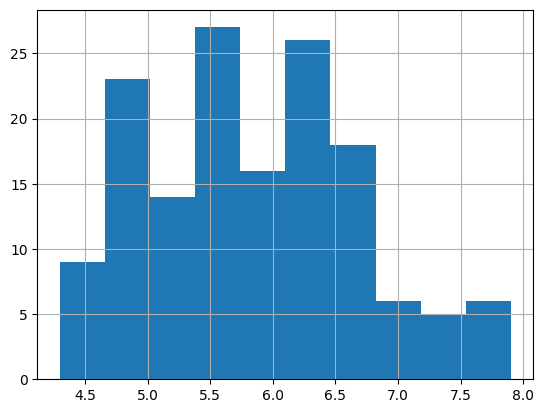

In [8]:
df['sepal_length'].hist()

<Axes: >

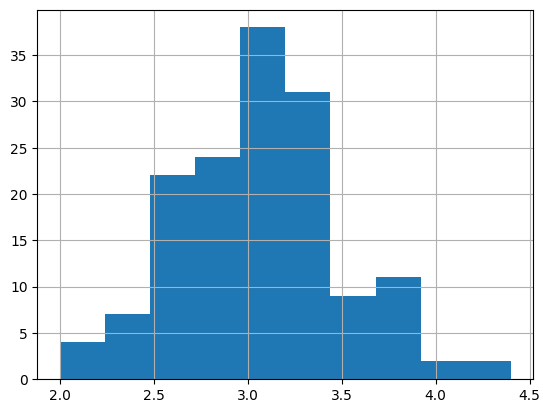

In [9]:
df['sepal_width'].hist()

<Axes: >

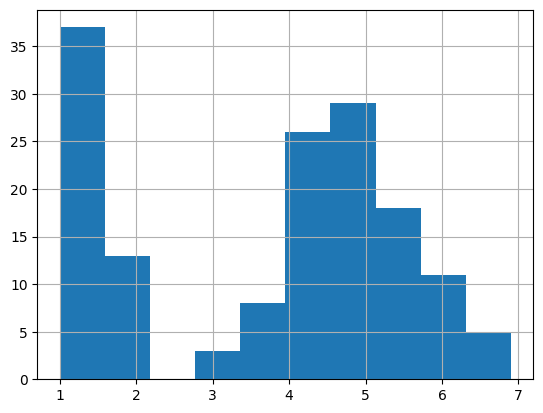

In [12]:
df['petal_length'].hist()

<Axes: >

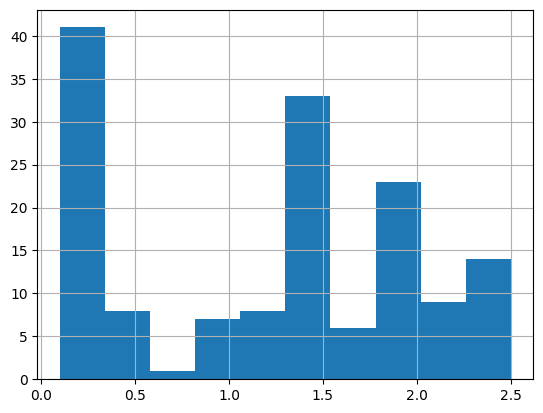

In [11]:
df['petal_width'].hist()

In [13]:
colors =['red','orange','blue']
species =['Iris-setosa','Iris-virginica','Iris-versicolor']

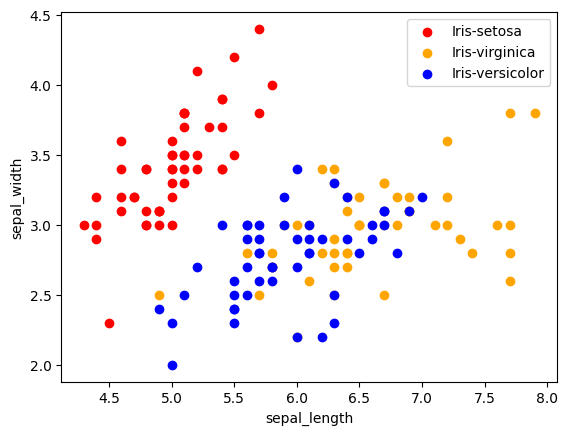

In [14]:
for i in range(3):
   x =df[df['species'] == species[i]]
   plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i] ,label =species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

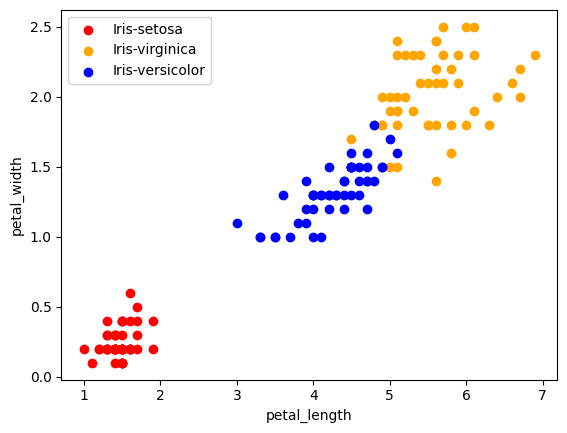

In [15]:
for i in range(3):
   x =df[df['species'] == species[i]]
   plt.scatter(x['petal_length'], x['petal_width'], c=colors[i] ,label =species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

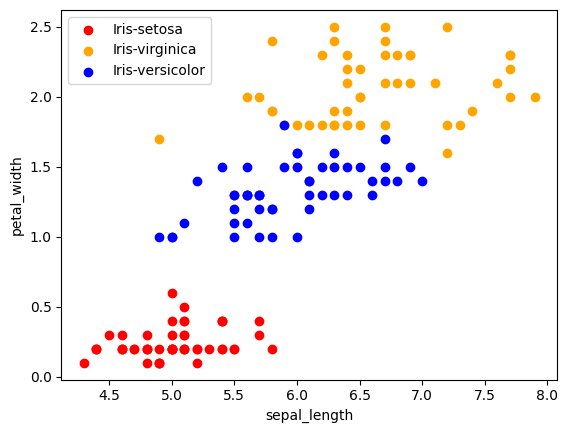

In [16]:
for i in range(3):
   x =df[df['species'] == species[i]]
   plt.scatter(x['sepal_length'], x['petal_width'], c=colors[i] ,label =species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_width")
plt.legend()

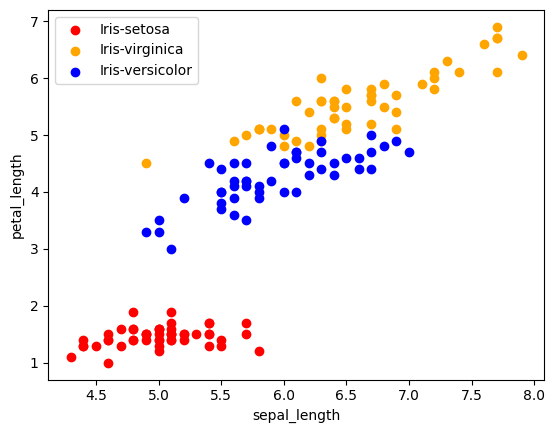

In [17]:
for i in range(3):
   x =df[df['species'] == species[i]]
   plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i] ,label =species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

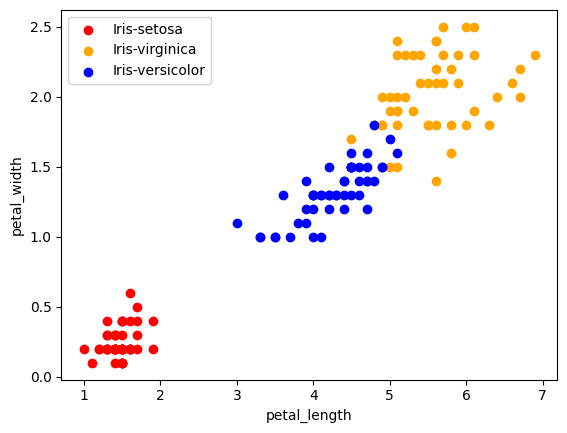

In [18]:
for i in range(3):
   x =df[df['species'] == species[i]]
   plt.scatter(x['petal_length'], x['petal_width'], c=colors[i] ,label =species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

In [19]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-20-34008680b0c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =df.corr()


<Axes: >

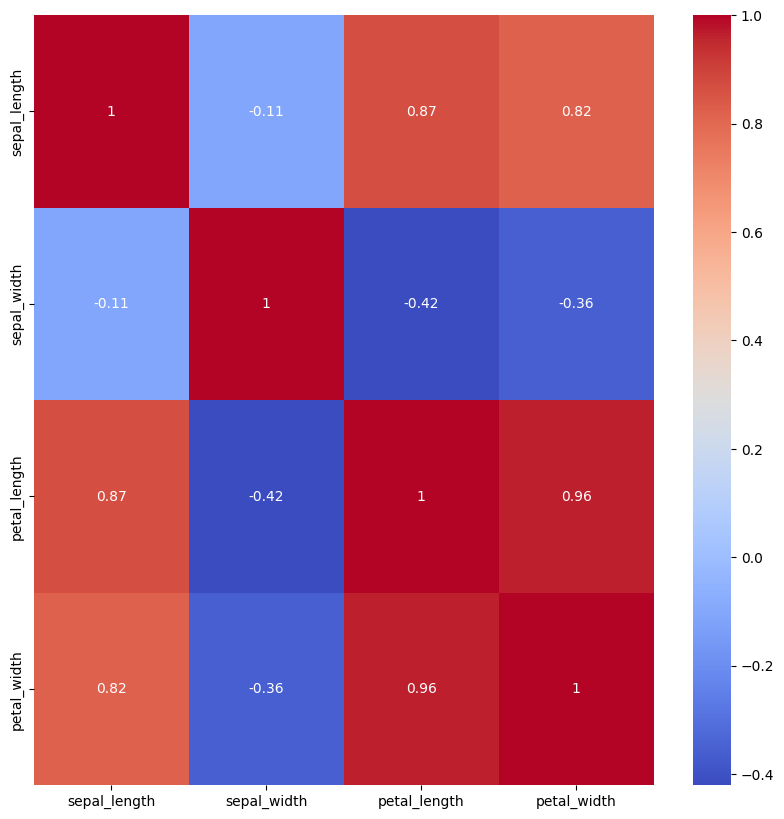

In [20]:
corr =df.corr()
fig ,ax = plt.subplots(figsize =(10,10))
sns.heatmap(corr,annot= True,ax =ax,cmap ='coolwarm')

In [21]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [22]:
df['species']= le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split
# train -70
# test -30
X =df.drop(columns=['species'])
Y =df['species']
x_train ,x_test ,y_train,y_test =train_test_split(X,Y, test_size =0.30,random_state=42)

In [7]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
model =LogisticRegression()


In [22]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)  # apply scaling on training data
model.score(X_test, y_test)


0.96

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 96.0


In [13]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()

In [15]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 80.0


In [18]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
print("Accuracy:",model.score(X_test,y_test)*100)

Accuracy: 92.0
